<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Inf_posponer_muerte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Análisis de Philips, Smith.

In [6]:
data=pd.read_table("muertes.txt",sep=' ')
data

,Week,Chinese,Jewish,Other
0,-12,44,138,308
1,-11,52,154,321
2,-10,55,153,319
3,-9,45,153,333
4,-8,56,126,315
5,-7,53,136,319
6,-6,61,163,287
7,-5,38,141,287
8,-4,46,143,323
9,-3,45,133,280


Usando regresión (lineal.)

In [123]:
semanas=[i for i in range(-12,13)]
semanas.remove(0)

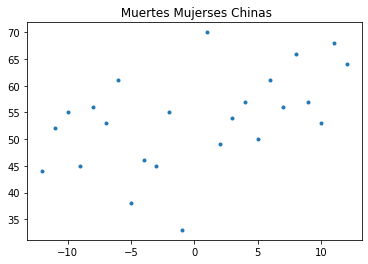

In [72]:
x=np.array(data['Week']).reshape((-1, 1))
y=np.array(data['Chinese'])

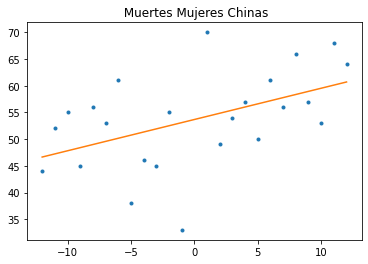

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
plt.plot(semanas,data['Chinese'],'.')
plt.title(' Muertes Mujeres Chinas')
plt.plot(semanas,model.intercept_+semanas*model.coef_)
plt.show()


In [97]:
from scipy import stats
expected=data['Chinese'][11]#Semana previa al festival
predicted=model.predict(np.array(-1).reshape((-1, 1)))[0]
std=np.std(data['Chinese'])
df=24-2-1# Num. Semanas-2 semanas de interés (-1,1)-1(formulazo)
print("p-value: ", 1-stats.t.cdf(abs(expected-predicted)/(std/np.sqrt(24)),df=df))

p-value:  1.5419421295348457e-10


In [96]:
#Análogamente
expected=data['Chinese'][12]#Semana posterior al festival
predicted=model.predict(np.array(1).reshape((-1, 1)))[0]#Prediccion
df=24-2-1# Num. Semanas-2 semanas de interés (-1,1)-1(formulazo)
print("p-value: ", 1-stats.t.cdf(abs(expected-predicted)/std,df=df))

p-value:  0.0452057729937978


Coincide con lo reportado por Philips, Smith. c: